## Observations and Insights 

In [218]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "/Users/alexisbloor/Desktop/Homework/Matplotlib/Mouse_metadata.csv"
study_results_path = "/Users/alexisbloor/Desktop/Homework/Matplotlib/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')
combined_df.head()
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [219]:
# Checking the number of mice.
print(combined_df['Mouse ID'].nunique())
print(combined_df['Mouse ID'].count())


249
1893


In [220]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
all_duplicates = combined_df[combined_df.duplicated(['Mouse ID'])]
duplicate_mice
# all_duplicates
# print(duplicate_mice.count())
# print(all_duplicates.count())


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [221]:
# Optional: Get all the data for the duplicate mouse ID. 



In [222]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [223]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumor = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dv_tumor = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"mean": mean_tumor, "median": median_tumor, "variance": variance_tumor, "standard deviation": std_dv_tumor, "sem": sem_tumor})
summary_df.round(3)

,mean,median,variance,standard deviation,sem
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.458,50.855,44.054,6.637,0.540
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [224]:
# Using the aggregation method, produce the same summary statistics in a single line
# regimen_data = pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count()).reset_index()
summary = new_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': [np.mean, np.median, np.var, np.std, st.sem]})
summary.round(3)


Tumor Volume (mm3)                              
                           mean  median     var    std    sem
Drug Regimen                                                 
Capomulin                40.676  41.558  24.948  4.995  0.329
Ceftamin                 52.591  51.776  39.290  6.268  0.470
Infubinol                52.885  51.821  43.129  6.567  0.492
Ketapril                 55.236  53.699  68.554  8.280  0.604
Naftisol                 54.332  52.509  66.173  8.135  0.596
Placebo                  54.034  52.289  61.168  7.821  0.581
Propriva                 52.458  50.855  44.054  6.637  0.540
Ramicane                 40.217  40.673  23.487  4.846  0.321
Stelasyn                 54.233  52.432  59.451  7.710  0.573
Zoniferol                53.237  51.818  48.533  6.967  0.516

## Bar and Pie Charts

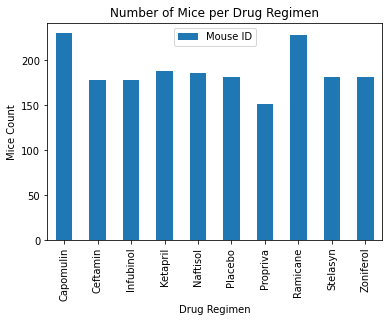

In [235]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugs = pd.DataFrame(new_df.groupby(["Drug Regimen"]).count()).reset_index()
drugs_df = drugs[["Drug Regimen", "Mouse ID"]]
drugs_df = drugs_df.set_index("Drug Regimen")

drugs_df.plot(kind="bar")
plt.ylabel("Mice Count")
plt.title("Number of Mice per Drug Regimen")
plt.show()

Text(0.5, 1.0, 'Population of Mice By Gender')

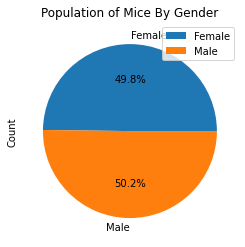

In [236]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# # gender = pd.DataFrame(new_df.groupby(["Sex"]).count()).reset_index()
# # gender
# # gender = gender[["Sex", "Mouse ID"]]
# # gender = gender.rename(columns={"Sex": "Gender", "Mouse ID": "Count"})
# # gender
genders = new_df.loc[:, ["Sex", "Mouse ID"]]
genders.nunique()
genders = genders.drop_duplicates()

gender = pd.DataFrame(genders.groupby(["Sex"]).count()).reset_index()
gender = gender.rename(columns={"Sex": "Gender", "Mouse ID": "Count"})
# gender.info()
labels = gender['Gender']
gender.plot(kind='pie', y="Count", autopct='%1.1f%%', labels=labels)
plt.title("Population of Mice By Gender")

Text(0.5, 1.0, 'Population of Mice By Gender')

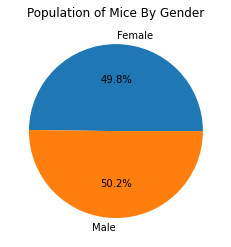

In [237]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = gender['Gender']
plt.pie(gender['Count'], labels=labels, autopct='%1.1f%%')
plt.title("Population of Mice By Gender")


## Quartiles, Outliers and Boxplots

In [228]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

drug_groups = new_df.loc[new_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

greatest_timepoint = drug_groups.groupby(["Mouse ID"])["Timepoint"].max()

merged_greatest = pd.merge(greatest_timepoint, drug_groups, on=['Timepoint', 'Mouse ID'], how='inner')
merged_greatest



,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a275,Ceftamin,Female,20,28,62.999356,3
3,45,a411,Ramicane,Male,3,22,38.407618,1
4,45,a444,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,45,y769,Ceftamin,Female,6,27,68.594745,4
96,45,y793,Capomulin,Male,17,17,31.896238,2
97,45,y865,Ceftamin,Male,23,26,64.729837,3
98,45,z578,Ramicane,Male,11,16,30.638696,0


In [229]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

tumor_vol_data = []
quartiles = merged_greatest['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
lwr_q = quartiles[0.25]
uppr_q = quartiles[0.75]
iqr = uppr_q - lwr_q

Capomulin = merged_greatest.loc[merged_greatest['Drug Regimen']== 'Capomulin']['Tumor Volume (mm3)']
Ramicane = merged_greatest.loc[merged_greatest['Drug Regimen']== 'Ramicane']['Tumor Volume (mm3)']
Infubinol = merged_greatest.loc[merged_greatest['Drug Regimen']== 'Infubinol']['Tumor Volume (mm3)']
Ceftamin = merged_greatest.loc[merged_greatest['Drug Regimen']== 'Ceftamin']['Tumor Volume (mm3)']
tumor_vol_data = [Capomulin, Ramicane, Infubinol, Ceftamin]


lwr_bound = lwr_q - (1.5*iqr)
uppr_bound = uppr_q + (1.5*iqr)

print(f"Values below {lwr_bound.round(3)} are potential outliers")
print(f"Values above {uppr_bound.round(3)} are potential outliers")

Values below 3.074 are potential outliers
Values above 94.044 are potential outliers


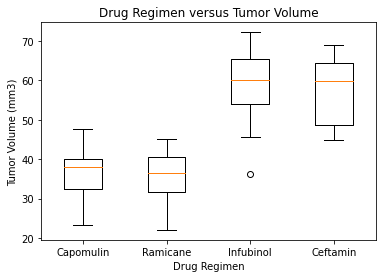

In [238]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, labels = treatments)
plt.title("Drug Regimen versus Tumor Volume")
plt.show()

## Line and Scatter Plots

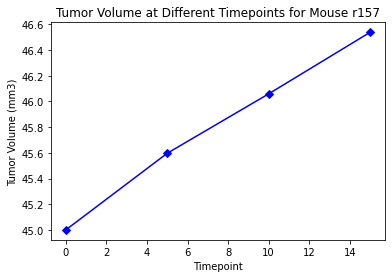

In [240]:
# Generate a line plot of tumor volume vs. time point for a SPECIFIC mouse treated with Capomulin
Capomulin_time = new_df.loc[new_df['Drug Regimen'] == "Capomulin", :]
Capomulin_time

mouse_r157 = Capomulin_time.loc[Capomulin_time["Mouse ID"] == "r157", :]
mouse_r157

x_axis = mouse_r157["Timepoint"]
tumor_volume = mouse_r157["Tumor Volume (mm3)"]
plt.plot(x_axis, tumor_volume, marker="D", color = "blue")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume at Different Timepoints for Mouse r157")
plt.show()

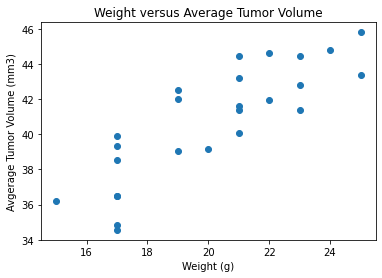

In [239]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_Capomulin = Capomulin_time.groupby(['Mouse ID']).mean()
plt.scatter(avg_Capomulin['Weight (g)'], avg_Capomulin['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Avgerage Tumor Volume (mm3)")
plt.title("Weight versus Average Tumor Volume")
plt.show()


## Correlation and Regression

The correlataion coefficient is 0.84
The linear regression equation is y= 0.95x +21.55


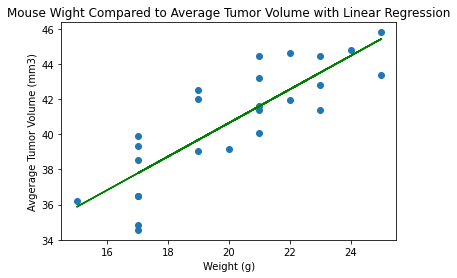

In [233]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# add to the scatter plot

corr_coeff = round(st.pearsonr(avg_Capomulin['Weight (g)'], avg_Capomulin['Tumor Volume (mm3)'])[0],2)
x_values = avg_Capomulin['Weight (g)']
y_values = avg_Capomulin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept

lin_reg = 'y= ' + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The correlataion coefficient is {corr_coeff}")
print(f"The linear regression equation is {lin_reg}")

plt.scatter(avg_Capomulin['Weight (g)'], avg_Capomulin['Tumor Volume (mm3)'])
plt.plot(avg_Capomulin['Weight (g)'], regress_values, color="green")
plt.xlabel("Weight (g)")
plt.ylabel("Avgerage Tumor Volume (mm3)")
plt.title("Mouse Wight Compared to Average Tumor Volume with Linear Regression")
plt.show()